In [ ]:
!pip install -U "tensorflow==2.8.*"
!pip install -U "tensorflow-text==2.8.*"

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
from gensim.parsing.preprocessing import preprocess_documents, preprocess_string
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text as tf_text

In [ ]:
!mkdir 'dataset/'
!unzip '/content/chatgpt-generated-text-detection-corpus-main.zip' -d 'dataset/'

In [ ]:
X_train = []
y_train = []
for dirname,_,filenames in os.walk('/content/dataset/chatgpt-generated-text-detection-corpus-main/full_texts/'):
  for file in filenames:
    sentence = open(os.path.join('/content/dataset/chatgpt-generated-text-detection-corpus-main/full_texts/',dirname,file),'r')
    X_train.append(sentence.read())
    if(dirname=='/content/dataset/chatgpt-generated-text-detection-corpus-main/full_texts/chatgpt'):
      y_train.append(1)
    else:
      y_train.append(0)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
print(X_train)
print(y_train)

['It is generally agreed that society benefits from the work of its members, and there are many different types of work that contribute to the betterment of society. Some people contribute through their work as artists, while others contribute through their work as scientists. While both artists and scientists make important contributions to society, it is difficult to say which type of contribution is valued more by any particular society.\nArtists contribute to society in a number of ways. They create works of art that are enjoyed by people all around the world, and their creations often have a deep emotional impact on those who experience them. Whether it is a painting, a sculpture, a film, or a piece of music, art has the power to move people in ways that few other things can. In addition to providing enjoyment and emotional fulfillment, art can also serve as a means of self-expression, and can be used to convey important ideas and messages to others.\nScientists, on the other hand

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [ ]:
X_train.shape

(201,)

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=False, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation='sigmoid', name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
classifier_model = build_classifier_model()

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
history = classifier_model.fit(X_train,y_train,epochs=60,validation_split=0.2)

Epoch 1/60


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5/5 [==============================] - 10s 896ms/step - loss: 0.6894 - binary_accuracy: 0.5688 - val_loss: 0.6447 - val_binary_accuracy: 0.5610
Epoch 2/60
5/5 [==============================] - 2s 373ms/step - loss: 0.6187 - binary_accuracy: 0.6750 - val_loss: 0.6596 - val_binary_accuracy: 0.5854
Epoch 3/60
5/5 [==============================] - 1s 246ms/step - loss: 0.6082 - binary_accuracy: 0.6625 - val_loss: 0.6052 - val_binary_accuracy: 0.5854
Epoch 4/60
5/5 [==============================] - 1s 254ms/step - loss: 0.5991 - binary_accuracy: 0.7250 - val_loss: 0.5434 - val_binary_accuracy: 0.7805
Epoch 5/60
5/5 [==============================] - 1s 233ms/step - loss: 0.5785 - binary_accuracy: 0.7375 - val_loss: 0.5131 - val_binary_accuracy: 0.7805
Epoch 6/60
5/5 [==============================] - 1s 162ms/step - loss: 0.5587 - binary_accuracy: 0.7437 - val_loss: 0.5176 - val_binary_accuracy: 0.8049
Epoch 7/60
5/5 [==============================] - 1s 158ms/step - loss: 0.5477 - binar

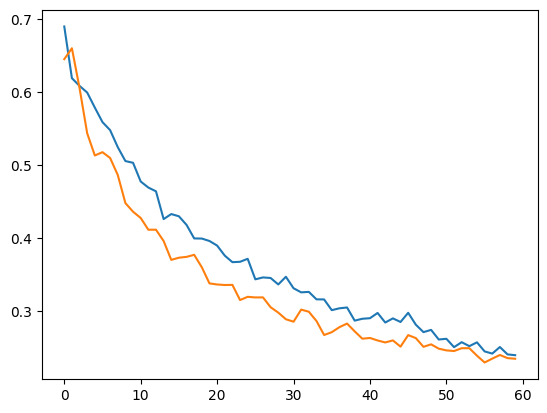

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
res=classifier_model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 134ms/step - loss: 0.2417 - binary_accuracy: 0.9216


In [ ]:
classifier_model(np.array(['''Of course! Here's a short essay on the topic of "The Impact of Social Media on Society":

In recent years, social media has emerged as a transformative force that has revolutionized the way people interact, communicate, and engage with the world around them. This technological phenomenon, driven by platforms such as Facebook, Twitter, Instagram, and TikTok, has fundamentally reshaped various aspects of society. While its influence spans across the globe, the impact of social media on society is a topic of both celebration and concern.

One of the most remarkable aspects of social media is its ability to connect individuals across geographical boundaries, fostering a sense of global community. People can easily communicate with friends, family, and even strangers from different corners of the world, breaking down barriers and opening up new avenues for cross-cultural exchange. Social media has enabled the rapid dissemination of information, allowing users to stay updated on news, events, and trends in real time.

However, the pervasive nature of social media also raises significant concerns. One prominent issue is the potential for misinformation and the rapid spread of fake news. The viral nature of content on social media platforms can lead to the amplification of unverified or biased information, which can have serious consequences on public perceptions and decision-making. Moreover, the constant exposure to curated content on social media may contribute to the creation of echo chambers, where individuals are surrounded by like-minded opinions, reinforcing existing beliefs and inhibiting constructive dialogue.

The psychological impact of social media is another area of scrutiny. The quest for validation through likes, shares, and comments can lead to feelings of inadequacy, anxiety, and even depression, especially among younger users. The phenomenon of comparing one's life to the carefully crafted portrayals on social media, known as "social media envy," has been linked to a negative impact on mental health.

On a positive note, social media has empowered individuals and marginalized groups to raise their voices and advocate for social justice. Movements like #BlackLivesMatter and #MeToo have gained momentum through social media platforms, shedding light on systemic issues and driving collective action for change.

In conclusion, the impact of social media on society is a complex interplay of benefits and challenges. It has undoubtedly bridged gaps, empowered voices, and facilitated global connectivity. However, it also raises concerns about misinformation, mental health, and the erosion of authentic human interactions. As we continue to navigate this digital landscape, it is crucial to strike a balance between leveraging the positive potential of social media while being mindful of its potential pitfalls. Society's ability to harness the power of social media for positive change will ultimately define its long-term influence.''']))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.95118976]], dtype=float32)>

In [ ]:
classifier_model.save('/content/model/')

In [ ]:
import pickle

# Suppose you have a trained model named 'model'
# Replace this with your actual model object

# Save the model as a .pkl file
model_filename = 'trained_model.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(classifier_model, model_file)

print(f"Model saved as '{model_filename}'")


Model saved as 'trained_model.pkl'


In [ ]:
!zip -r '/content/model.zip' '/content/model/'

  adding: content/model/ (stored 0%)
  adding: content/model/saved_model.pb (deflated 92%)
  adding: content/model/assets/ (stored 0%)
  adding: content/model/assets/vocab.txt (deflated 53%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model/variables/variables.index (deflated 74%)
  adding: content/model/keras_metadata.pb (deflated 83%)
